In [1]:

# Imports
import sys
sys.executable
import numpy as np
import requests # for downloading webpages
from bs4 import BeautifulSoup  # for parsing HTML
import pandas as pd # for storing and handling datasets
import time # for adding delays between requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



In [6]:
df_score = pd.read_pickle("sustainability_scores.pkl")

In [10]:
df_ml = df_score.copy()

In [11]:
df_ml.info

<bound method DataFrame.info of         Id      Brand                                  Product_Name     Price  \
0        1        H&M              Jacquard-knit merino wool jumper   € 79.99   
1        2        H&M                               Oversize Jumper   € 24.99   
2        3       Zara                              Soft Knit Jumper   € 25.95   
3        4       Zara                     Cashmere Oversize Sweater  € 139.00   
4        5  Patagonia  Women's Recycled Wool-Blend Crewneck Sweater  € 160.00   
...    ...        ...                                           ...       ...   
1001  1002       Zara                               Jacket Slim Fit   € 83.95   
1002  1003  Patagonia                               Jumper Textured  € 113.09   
1003  1004  Patagonia                             Jumper Asymmetric  € 108.94   
1004  1005  Patagonia                                 Jumper Ribbed  € 224.17   
1005  1006        H&M                              Jacket Oversized   € 27.97

In [12]:
df_ml.dtypes

Id                             int64
Brand                         object
Product_Name                  object
Price                         object
Category                      object
Subcategory                   object
Score_100                    float64
S_final                      float64
S_env                        float64
Score_env_burden             float64
Certification_Total          float64
Material_CO2_norm            float64
Material_Water_norm          float64
Material_Energy_norm         float64
Material_Chemical_norm       float64
Care_CO2_norm                float64
Care_Water_norm              float64
Care_Energy_norm             float64
Origin_Grid_norm             float64
Origin_Transport_norm        float64
Origin_Manufacturing_norm    float64
dtype: object

In [13]:
df_ml["Id"].duplicated().sum()

np.int64(0)

In [14]:
df_ml.isna().sum().sum()

np.int64(0)

In [15]:
df_ml.head()

,Id,Brand,Product_Name,Price,Category,Subcategory,Score_100,S_final,S_env,Score_env_burden,...,Material_CO2_norm,Material_Water_norm,Material_Energy_norm,Material_Chemical_norm,Care_CO2_norm,Care_Water_norm,Care_Energy_norm,Origin_Grid_norm,Origin_Transport_norm,Origin_Manufacturing_norm
0,1,H&M,Jacquard-knit merino wool jumper,€ 79.99,Woman,Jumper,76.0,0.760372,0.610372,0.389628,...,0.442509,0.294938,0.779978,0.728850,0.0,0.0,0.0,0.65,0.40,0.60
1,2,H&M,Oversize Jumper,€ 24.99,Woman,Jumper,44.0,0.437647,0.437647,0.562353,...,0.181185,0.024195,0.377338,0.390817,1.0,1.0,1.0,0.65,0.40,0.60
2,3,Zara,Soft Knit Jumper,€ 25.95,Woman,Jumper,71.0,0.711008,0.461008,0.538992,...,0.133275,0.025011,0.264026,0.317607,1.0,1.0,1.0,0.65,0.40,0.60
3,4,Zara,Cashmere Oversize Sweater,€ 139.00,Woman,Jumper,50.0,0.499217,0.499217,0.500783,...,1.000000,0.257830,1.000000,1.000000,0.0,0.0,0.0,0.55,0.45,0.75
4,5,Patagonia,Women's Recycled Wool-Blend Crewneck Sweater,€ 160.00,Woman,Sweater,100.0,1.000000,0.865000,0.135000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.45,0.35,0.55


In [29]:
df_ml["Price"] = pd.to_numeric(df_ml["Price"], errors="coerce")


In [30]:
df_ml["Price"].dtype

dtype('float64')

In [32]:
df_score["Price"].dtype
df_score["Price"].head()


0     € 79.99
1     € 24.99
2     € 25.95
3    € 139.00
4    € 160.00
Name: Price, dtype: object

In [33]:
df_score["Price"] = (
    df_score["Price"].astype(str)
    .str.replace("€", "", regex=False)
    .str.strip()
)
df_score["Price"] = pd.to_numeric(df_score["Price"], errors="coerce")


In [31]:
df_ml["Price"].isna().sum()


np.int64(0)

In [16]:
list(df_ml.columns)

['Id',
 'Brand',
 'Product_Name',
 'Price',
 'Category',
 'Subcategory',
 'Score_100',
 'S_final',
 'S_env',
 'Score_env_burden',
 'Certification_Total',
 'Material_CO2_norm',
 'Material_Water_norm',
 'Material_Energy_norm',
 'Material_Chemical_norm',
 'Care_CO2_norm',
 'Care_Water_norm',
 'Care_Energy_norm',
 'Origin_Grid_norm',
 'Origin_Transport_norm',
 'Origin_Manufacturing_norm']

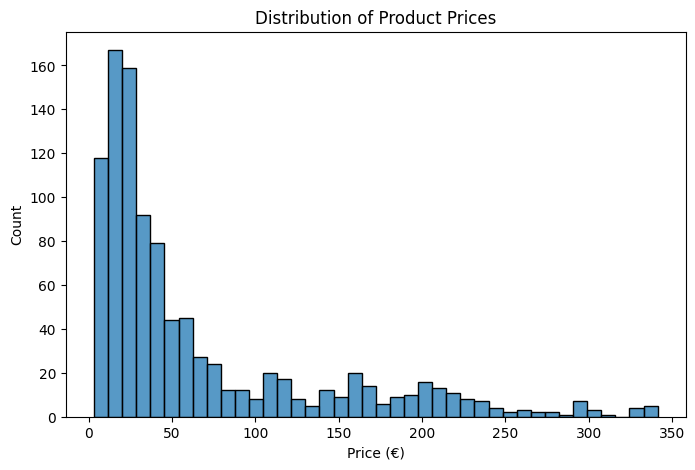

In [ ]:
#Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df_ml["Price"], bins=40)

plt.title("Distribution of Product Prices")
plt.xlabel("Price (€)")
plt.show()


The distribution of product prices exhibits strong positive skewness, reflecting the presence of a large mass-market segment alongside a smaller premium-priced category. This structure is consistent with known pricing dynamics in the fashion industry.

In [20]:
# price correlation
corr = df_ml.corr(numeric_only=True)["Price"].sort_values(ascending=False)

print(corr)


Price                        1.000000
Certification_Total          0.715244
S_final                      0.571663
Score_100                    0.570215
Material_Energy_norm         0.108972
Material_Chemical_norm       0.070577
Material_CO2_norm            0.057178
S_env                        0.040766
Id                          -0.011463
Origin_Manufacturing_norm   -0.019660
Origin_Transport_norm       -0.019664
Origin_Grid_norm            -0.019742
Score_env_burden            -0.040766
Material_Water_norm         -0.050640
Care_CO2_norm               -0.060282
Care_Water_norm             -0.060282
Care_Energy_norm            -0.060282
Name: Price, dtype: float64


The sustainability score demonstrates a moderate-to-strong positive correlation with retail price, suggesting that more sustainable products tend to be positioned at higher price points.
Products with certifications are MUCH more expensive.
Why is certification stronger than the full score?
Because certifications act as a market signal. Consumers recognize them. Brands market them.
Retailers price accordingly.
Meanwhile:
Customers cannot see:
CO₂ normalization
chemical intensity
energy metrics
So certifications influence pricing more directly.
While lifecycle impacts contribute to sustainability assessment, market pricing appears to respond more strongly to visible sustainability signals such as certifications.

Are some brands systematically more sustainable?

In [37]:
df_score.groupby("Brand")["Score_100"].mean()


Brand
H&M          56.786561
Patagonia    84.591241
Penneys      52.257261
Zara         56.920168
Name: Score_100, dtype: float64

<Axes: >

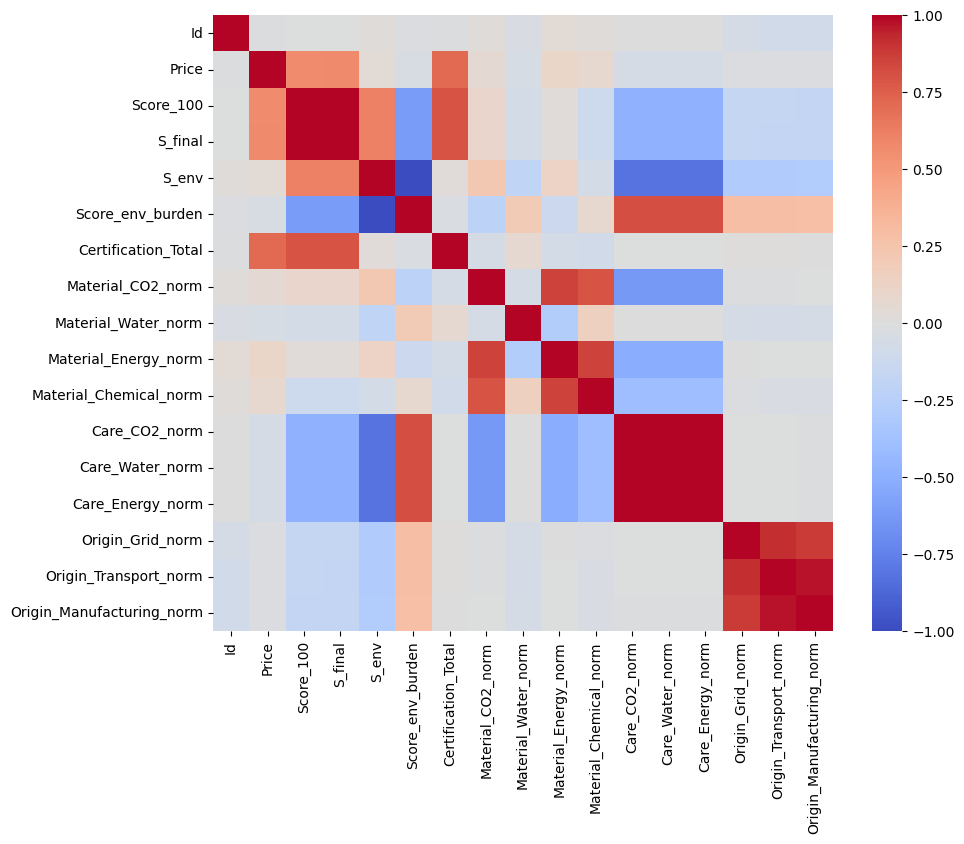

In [40]:
plt.figure(figsize=(10,8))

sns.heatmap(
    df_ml.corr(numeric_only=True),
    cmap="coolwarm",
    center=0
)



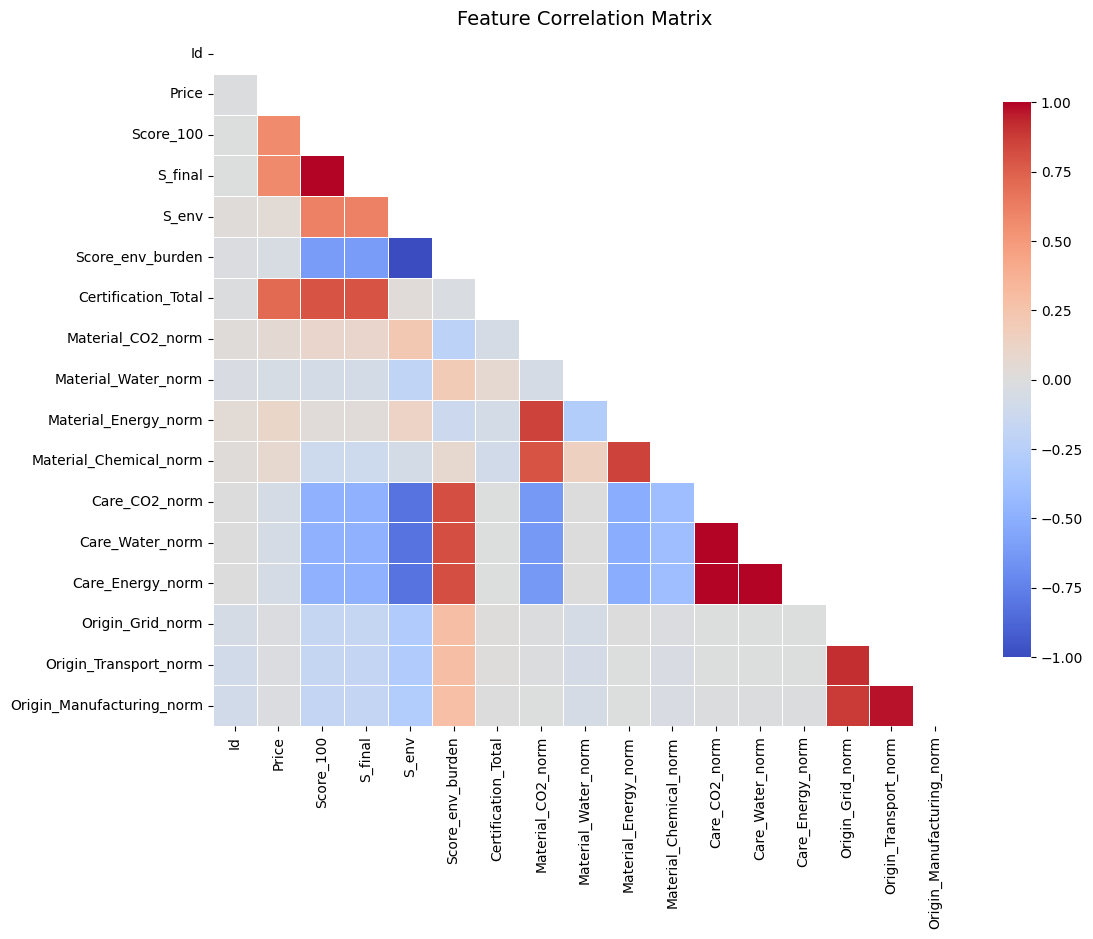

In [42]:
plt.figure(figsize=(12,9))

sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()


Market pricing responds strongly to visible sustainability signals such as certifications

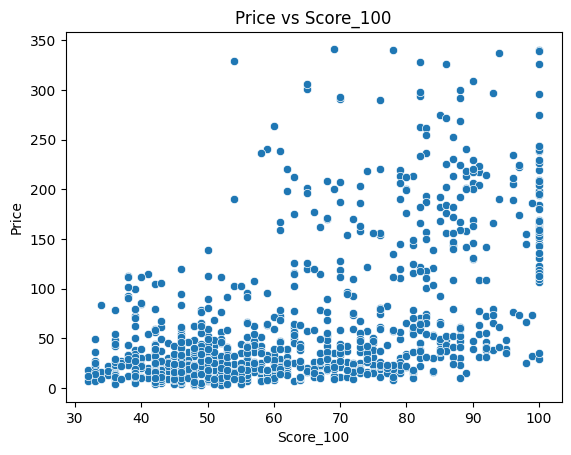

In [ ]:
sns.scatterplot(
    x=df_ml["Score_100"],
    y=df_ml["Price"]
)

plt.title("Price vs Score_100")
plt.show()



The scatterplot reveals substantial dispersion in prices across all sustainability levels, indicating that sustainability alone does not determine product pricing. While a slight upward tendency is observable among higher-scoring products, the relationship remains weak, suggesting sustainability contributes to pricing but is not the dominant driver.

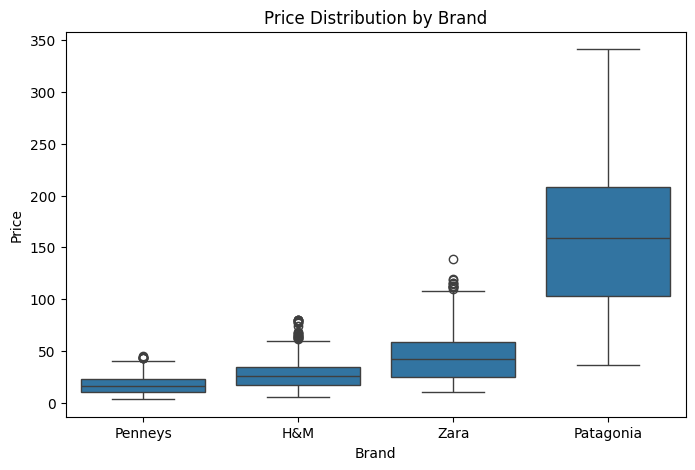

In [34]:
order = (
    df_score.groupby("Brand")["Price"]
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(8,5))

sns.boxplot(
    x="Brand",
    y="Price",
    data=df_score,
    order=order
)

plt.title("Price Distribution by Brand")
plt.show()



The substantial variation in price distributions across brands highlights the importance of brand positioning as a key determinant of retail pricing, beyond sustainability attributes alone.
Look at Patagonia.

Ask yourself:

Is Patagonia expensive because it is sustainable?
OR
Is it sustainable because it is premium?
There may be brand–sustainability coupling.
Which leads to a very advanced interpretation:
Higher sustainability scores may partially reflect premium brand positioning rather than sustainability acting as an independent price driver.

In [25]:
df_ml["Price"].describe()


count    1006.000000
mean       65.610318
std        72.204048
min         3.230000
25%        18.692500
50%        33.505000
75%        79.150000
max       341.420000
Name: Price, dtype: float64

In [43]:
cols_to_drop = [
    "Id",
    "Product_Name",
    
    # Composite sustainability scores → leakage
    "Score_100",
    "S_final",
    "S_env",
    "Score_env_burden",
    
    # Post-purchase impacts → not price drivers
    #"Care_CO2_norm",
    #"Care_Water_norm",
    #"Care_Energy_norm"
]

df_ml = df_ml.drop(columns=cols_to_drop, errors="ignore")

To avoid feature redundancy and potential leakage, the composite sustainability score was excluded from predictive modeling when its underlying components were used as predictors.

In [44]:
print("Rows:", df_ml.shape[0])
print("Columns:", df_ml.shape[1])


Rows: 1006
Columns: 15


In [45]:
#encode
df_ml = pd.get_dummies(
    df_ml,
    columns=["Brand", "Category", "Subcategory"],
    drop_first=True
)

In [47]:
df_ml.shape


(1006, 19)

In [71]:
df_ml.corr(numeric_only=True)["Price"].sort_values(ascending=False)


Price                        1.000000
Brand_Patagonia              0.785854
Certification_Total          0.715244
Material_Energy_norm         0.108972
Material_Chemical_norm       0.070577
Material_CO2_norm            0.057178
Subcategory_Jumper          -0.006368
Subcategory_Sweater         -0.008875
Origin_Manufacturing_norm   -0.019660
Origin_Transport_norm       -0.019664
Origin_Grid_norm            -0.019742
Category_Woman              -0.045265
Material_Water_norm         -0.050640
Care_CO2_norm               -0.060282
Care_Energy_norm            -0.060282
Care_Water_norm             -0.060282
Brand_Zara                  -0.141808
Subcategory_Tshirt          -0.326706
Brand_Penneys               -0.375210
Name: Price, dtype: float64

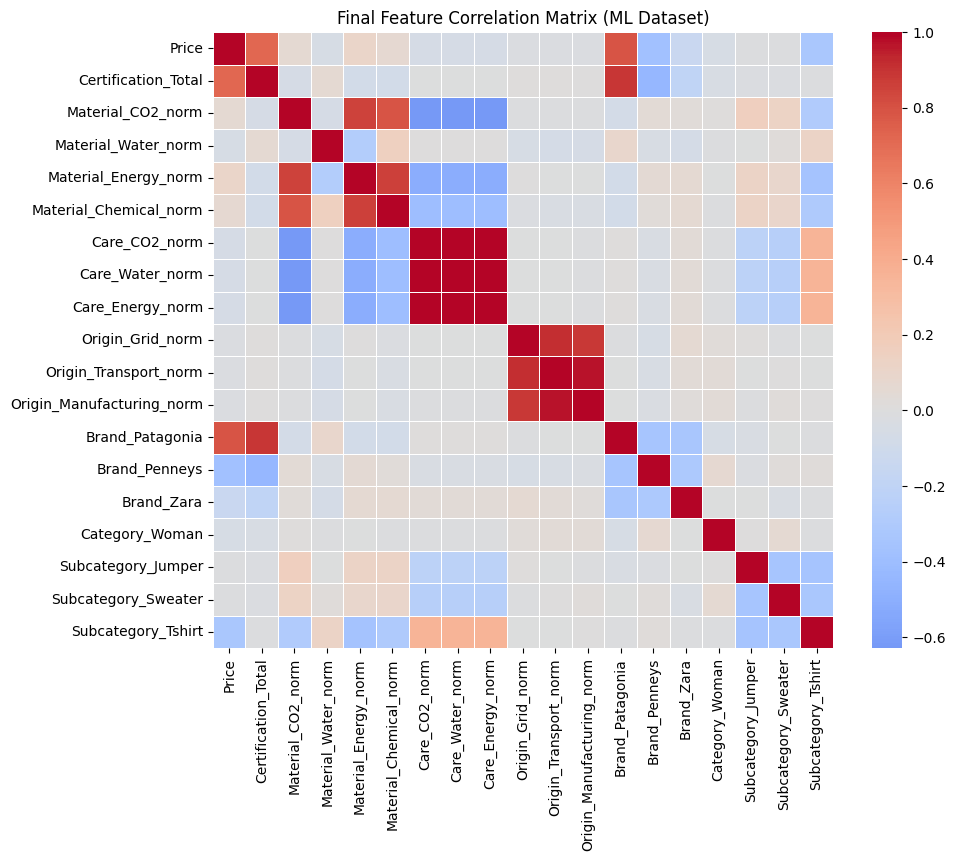

In [72]:
plt.figure(figsize=(10,8))

corr = df_ml.corr(numeric_only=True)

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Final Feature Correlation Matrix (ML Dataset)")
plt.show()


In [73]:
df_ml.to_csv("df_ml_ready_for_model.csv", index=False)


In [52]:
# define target and feature
y = df_ml["Price"]
X = df_ml.drop(columns=["Price"])


In [51]:
# train test split 80/20

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


Decision Tree
R²   : 0.8172
MAE  : 18.00 €
RMSE : 31.55 €


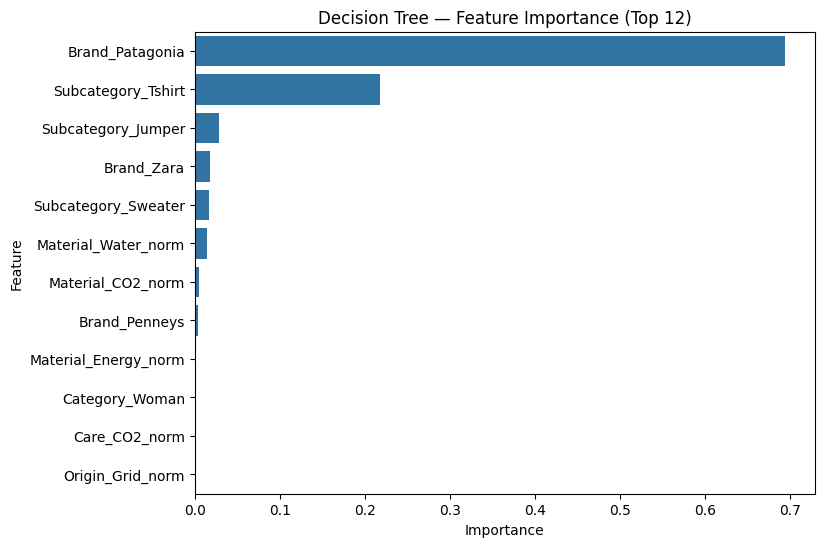

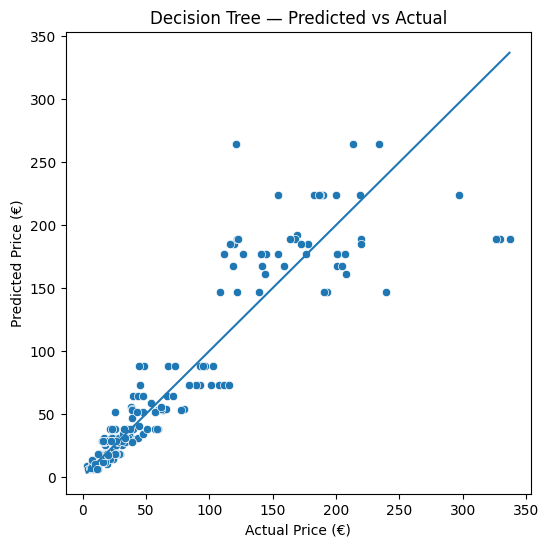

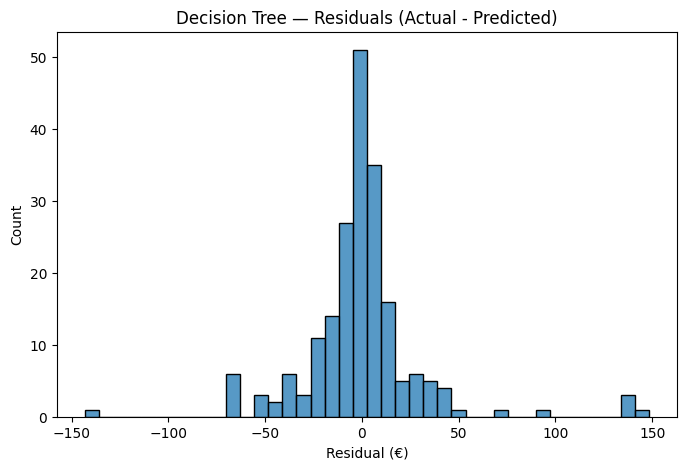

In [69]:
# Decision Tree Model
# ----------------------------
tree = DecisionTreeRegressor(
    max_depth=6,
    min_samples_leaf=10,
    random_state=42
)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Metrics (Regression)
# ----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Decision Tree")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:.2f} €")
print(f"RMSE : {rmse:.2f} €")

#  Visualization A: Feature Importance (Top 12)
# ----------------------------
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances.values[:12], y=importances.index[:12])
plt.title("Decision Tree — Feature Importance (Top 12)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Visualization B: Predicted vs Actual
# ----------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Decision Tree — Predicted vs Actual")

mn = float(min(y_test.min(), y_pred.min()))
mx = float(max(y_test.max(), y_pred.max()))
plt.plot([mn, mx], [mn, mx])
plt.show()
# Visualization C: Residuals Distribution
# ----------------------------
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=40)
plt.title("Decision Tree — Residuals (Actual - Predicted)")
plt.xlabel("Residual (€)")
plt.ylabel("Count")
plt.show()


R²   : 0.834
MAE  : 17.91 €
RMSE : 30.11 €


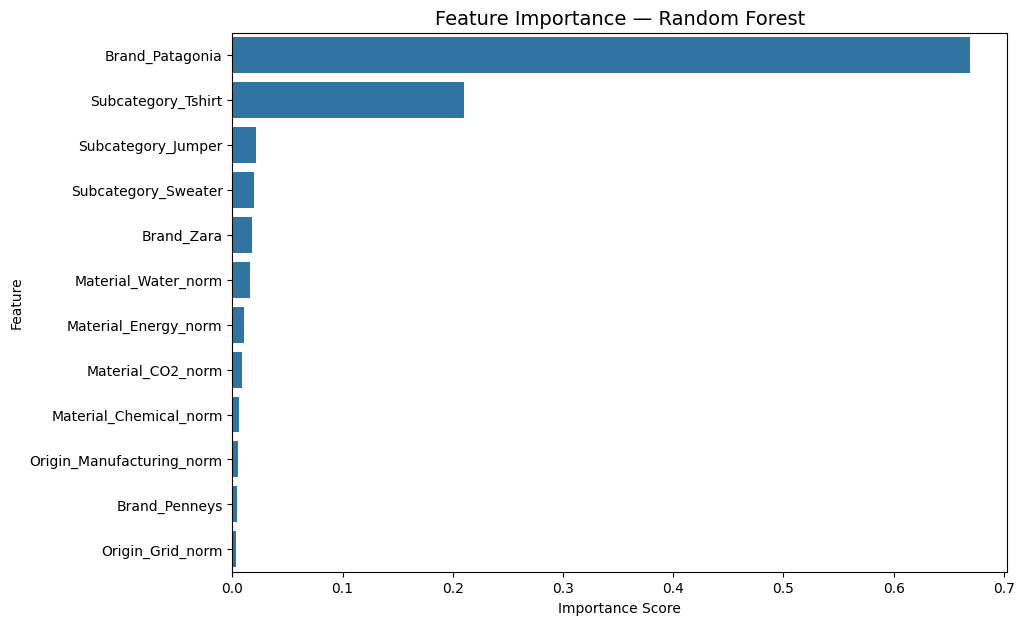

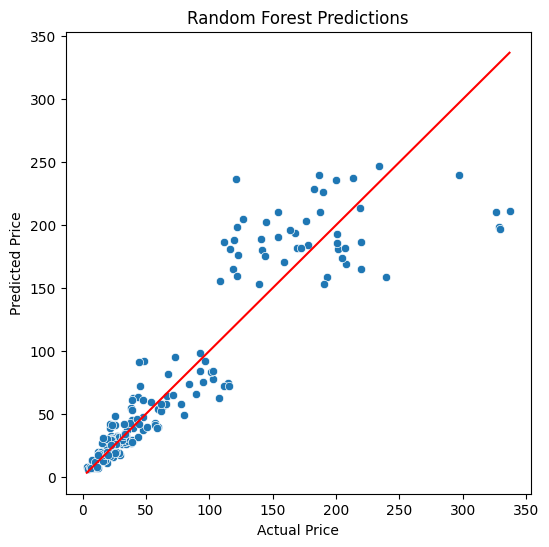

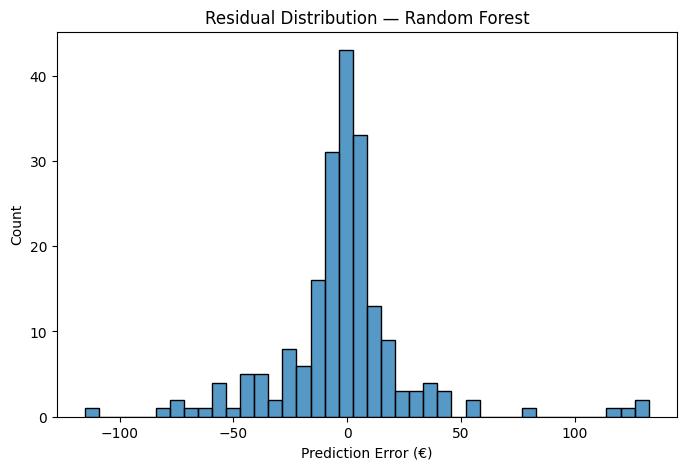

In [58]:
# random forest
rf = RandomForestRegressor(
    n_estimators=500,     # strong stability
    max_depth=None,       # allow complexity
    min_samples_leaf=5,   # reduce noise
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

r2 = r2_score(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"R²   : {r2:.3f}")
print(f"MAE  : {mae:.2f} €")
print(f"RMSE : {rmse:.2f} €")



# importance feature

importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,7))

sns.barplot(
    x=importance.values[:12],
    y=importance.index[:12]
)

plt.title("Feature Importance — Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

plt.show()


#actual x price
plt.figure(figsize=(6,6))

sns.scatterplot(x=y_test, y=rf_pred)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest Predictions")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")

plt.show()

#residual plot
residuals = y_test - rf_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=40)

plt.title("Residual Distribution — Random Forest")
plt.xlabel("Prediction Error (€)")
plt.show()




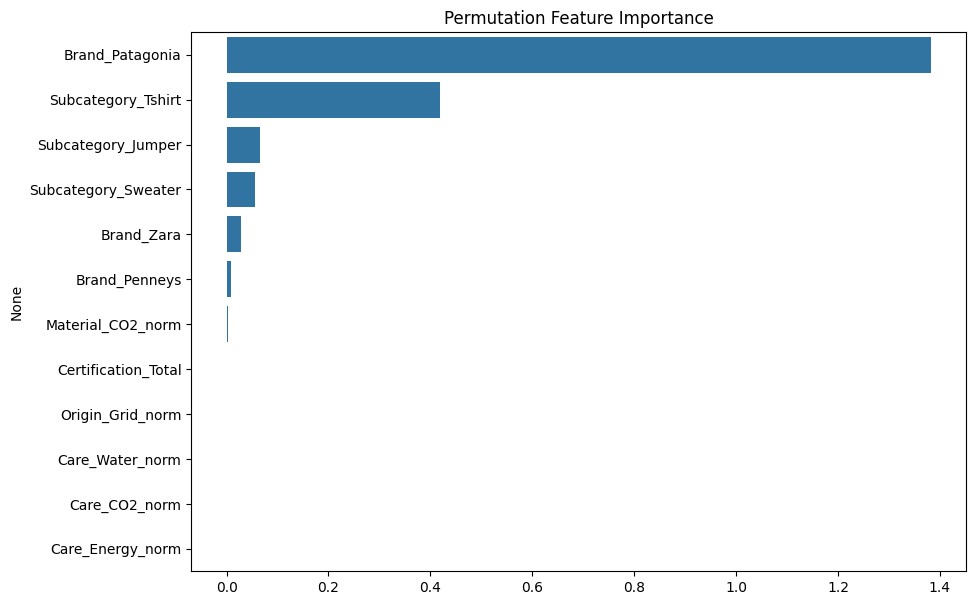

In [60]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_importance = pd.Series(
    perm.importances_mean,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=perm_importance.values[:12],
            y=perm_importance.index[:12])

plt.title("Permutation Feature Importance")
plt.show()


When brand identifiers were removed, sustainability-related variables increased in importance, suggesting that sustainability contributes to pricing but is often embedded within brand value.

Best RF params: {'n_estimators': 800, 'min_samples_leaf': 5, 'max_features': 0.7, 'max_depth': 20, 'bootstrap': True}
R²   : 0.830
MAE  : 18.02 €
RMSE : 30.45 €


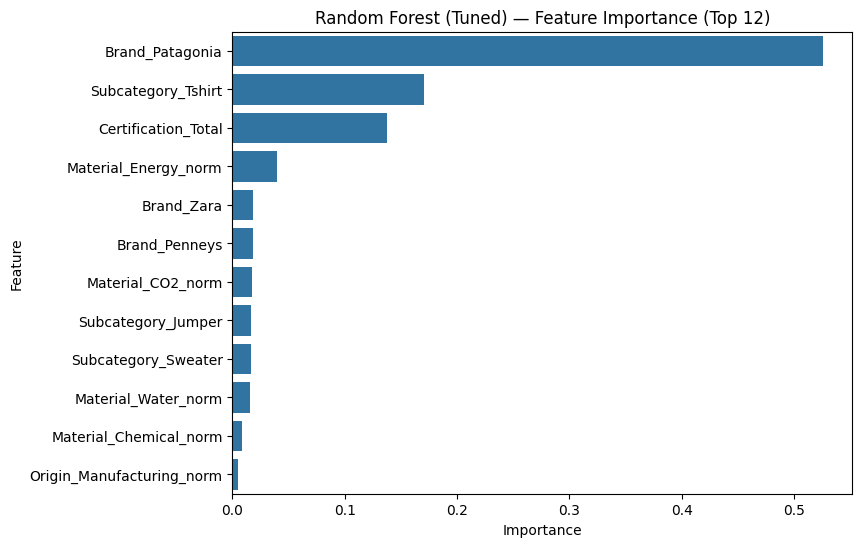

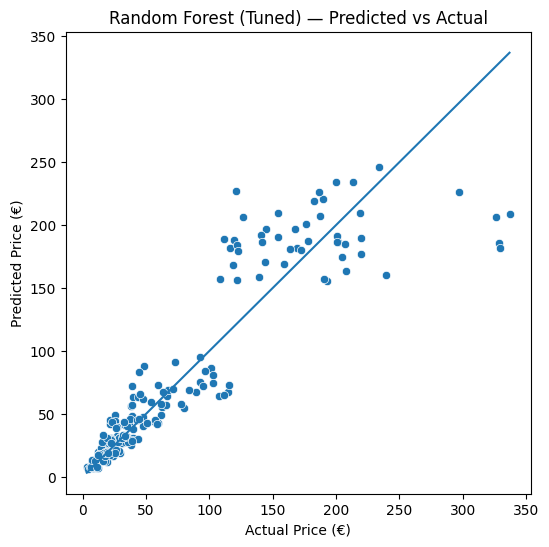

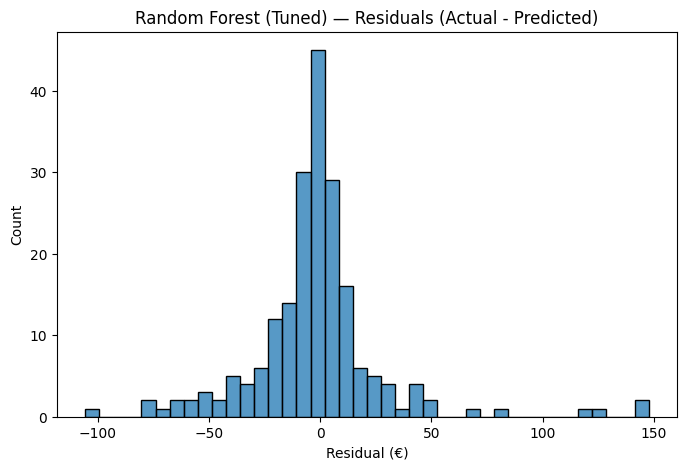

In [59]:


from sklearn.model_selection import RandomizedSearchCV

# Random Forest (Tuned) — uses SAME split


# Define model + parameter space
rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [300, 500, 800],
    "max_depth": [None, 10, 20, 30],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", "log2", 0.7],
    "bootstrap": [True]
}

# Randomized search (best params via CV)
search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,         
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

best_rf = search.best_estimator_
print("Best RF params:", search.best_params_)

#  Predict + metrics on test set
rf_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"R²   : {r2:.3f}")
print(f"MAE  : {mae:.2f} €")
print(f"RMSE : {rmse:.2f} €")

# 4) Visualization A: Feature Importance (Top 12)
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances.values[:12], y=importances.index[:12])
plt.title("Random Forest (Tuned) — Feature Importance (Top 12)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 5) Visualization B: Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf_pred)
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Random Forest (Tuned) — Predicted vs Actual")

mn = float(min(y_test.min(), rf_pred.min()))
mx = float(max(y_test.max(), rf_pred.max()))
plt.plot([mn, mx], [mn, mx])
plt.show()

# 6) Visualization C: Residuals Distribution
residuals = y_test - rf_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=40)
plt.title("Random Forest (Tuned) — Residuals (Actual - Predicted)")
plt.xlabel("Residual (€)")
plt.ylabel("Count")
plt.show()


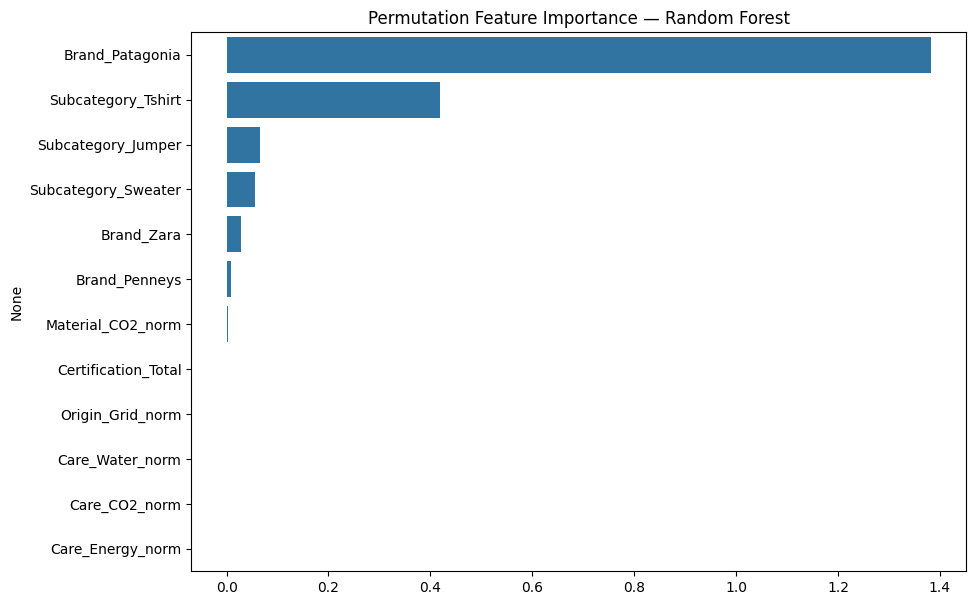

In [62]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf,   # your tuned model
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_importance = pd.Series(
    perm.importances_mean,
    index=X_test.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(
    x=perm_importance.values[:12],
    y=perm_importance.index[:12]
)

plt.title("Permutation Feature Importance — Random Forest")
plt.show()


Premium brand positioning is the strongest predictor of price, but sustainability certifications also contribute significantly to pricing decisions.
Feature importance analysis revealed that brand identity was the strongest determinant of product price, reflecting the well-established role of brand positioning in fashion markets. However, sustainability certifications emerged as one of the most influential non-brand predictors, suggesting that verified sustainable practices contribute positively to perceived product value. This indicates that while sustainability alone does not define pricing, it enhances price formation when aligned with strong brand narratives.
energy-intensive materials may be associated with higher-cost production.
Feature importance shifted after hyperparameter tuning, indicating that model constraints reduced reliance on dominant brand signals and allowed secondary predictors such as sustainability certifications to emerge.
Although predictive performance was similar across configurations, the tuned Random Forest provided clearer feature hierarchies and reduced model variance, improving interpretability.
The dominance of a premium brand suggests the dataset captures real-world market stratification between mass-market and high-end retailers.

Level 1 — Brand positioning
Level 2 — Product type
Level 3 — Sustainability certification
Level 4 — Material impacts


Gradient Boosting results
R²   : 0.818
MAE  : 18.91 €
RMSE : 31.48 €


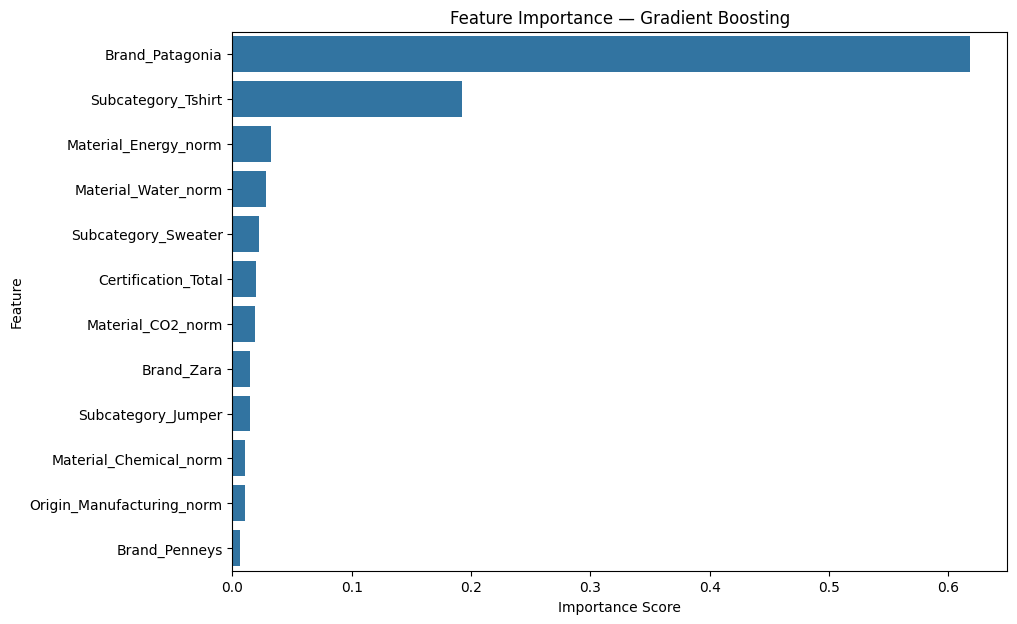

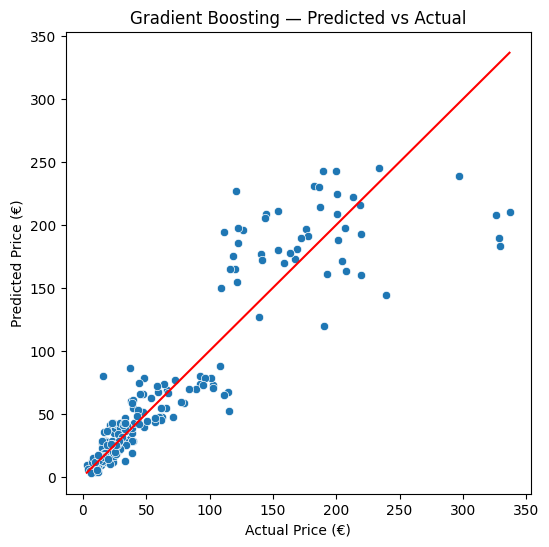

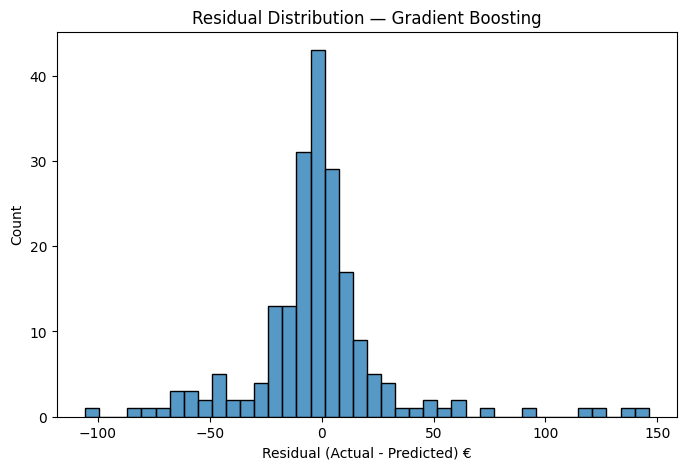

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting 

#Train Gradient Boosting model (strong default params)
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,          # controls tree depth inside boosting
    subsample=0.8,        # adds robustness
    random_state=42
)

gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

# 2) Metrics
r2 = r2_score(y_test, gbr_pred)
mae = mean_absolute_error(y_test, gbr_pred)
rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))

print("\nGradient Boosting results")
print(f"R²   : {r2:.3f}")
print(f"MAE  : {mae:.2f} €")
print(f"RMSE : {rmse:.2f} €")

# 3) Visualization A: Feature Importance (Top 12)
importance = pd.Series(
    gbr.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=importance.values[:12], y=importance.index[:12])
plt.title("Feature Importance — Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# 4) Visualization B: Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gbr_pred)
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Gradient Boosting — Predicted vs Actual")

mn = float(min(y_test.min(), gbr_pred.min()))
mx = float(max(y_test.max(), gbr_pred.max()))
plt.plot([mn, mx], [mn, mx], color="red")
plt.show()

# 5) Visualization C: Residuals Distribution
residuals = y_test - gbr_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=40)
plt.title("Residual Distribution — Gradient Boosting")
plt.xlabel("Residual (Actual - Predicted) €")
plt.ylabel("Count")
plt.show()


In [70]:
# table comparison
# Create empty list

results = []

def add_results(model_name, y_true, y_hat):
    results.append({
        "Model": model_name,
        "R²": r2_score(y_true, y_hat),
        "MAE (€)": mean_absolute_error(y_true, y_hat),
        "RMSE (€)": np.sqrt(mean_squared_error(y_true, y_hat))
    })

# ✅ Use the prediction variables YOU actually created
add_results("Decision Tree", y_test, y_pred)
add_results("Random Forest (Tuned)", y_test, rf_pred)     # <- change name if yours is different
add_results("Gradient Boosting", y_test, gbr_pred)         # <- change name if yours is different

comparison_df = pd.DataFrame(results).sort_values("R²", ascending=False).round(3)
comparison_df




,Model,R²,MAE (€),RMSE (€)
1,Random Forest (Tuned),0.830,18.021,30.452
2,Gradient Boosting,0.818,18.914,31.482
0,Decision Tree,0.817,18.005,31.546
